In [1]:
import pandas as pd

In [2]:
dades = pd.read_csv(  r"C:\\DataScience\\string5\\housing data.csv", header=None)

In [3]:
dades.columns=["CRIM","ZN","INDUS", "CHAS", "NOX", "RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [5]:
dades.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [6]:
from sklearn import preprocessing
norm=preprocessing.normalize(dades.values)
Dades_norm=pd.DataFrame(norm, columns=dades.columns,index=dades.index)

In [7]:
Dades_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.005069,0.011668,0.000013,0.000161,0.000496,0.005244,0.113071
ZN,506.0,0.022790,0.046744,0.000000,0.000000,0.000000,0.024602,0.207198
INDUS,506.0,0.018789,0.010680,0.000958,0.010663,0.017216,0.023835,0.061206
CHAS,506.0,0.000129,0.000481,0.000000,0.000000,0.000000,0.000000,0.002369
NOX,506.0,0.000988,0.000189,0.000659,0.000871,0.000969,0.001052,0.002064
RM,506.0,0.011508,0.002667,0.004679,0.009431,0.011921,0.013332,0.018058
AGE,506.0,0.120548,0.048389,0.006420,0.086027,0.126141,0.156434,0.237496
DIS,506.0,0.007253,0.004580,0.001451,0.003297,0.006387,0.010735,0.027559
RAD,506.0,0.014927,0.010745,0.001729,0.007920,0.010064,0.030633,0.035794
TAX,506.0,0.690457,0.151936,0.424980,0.574361,0.651586,0.850816,0.993280


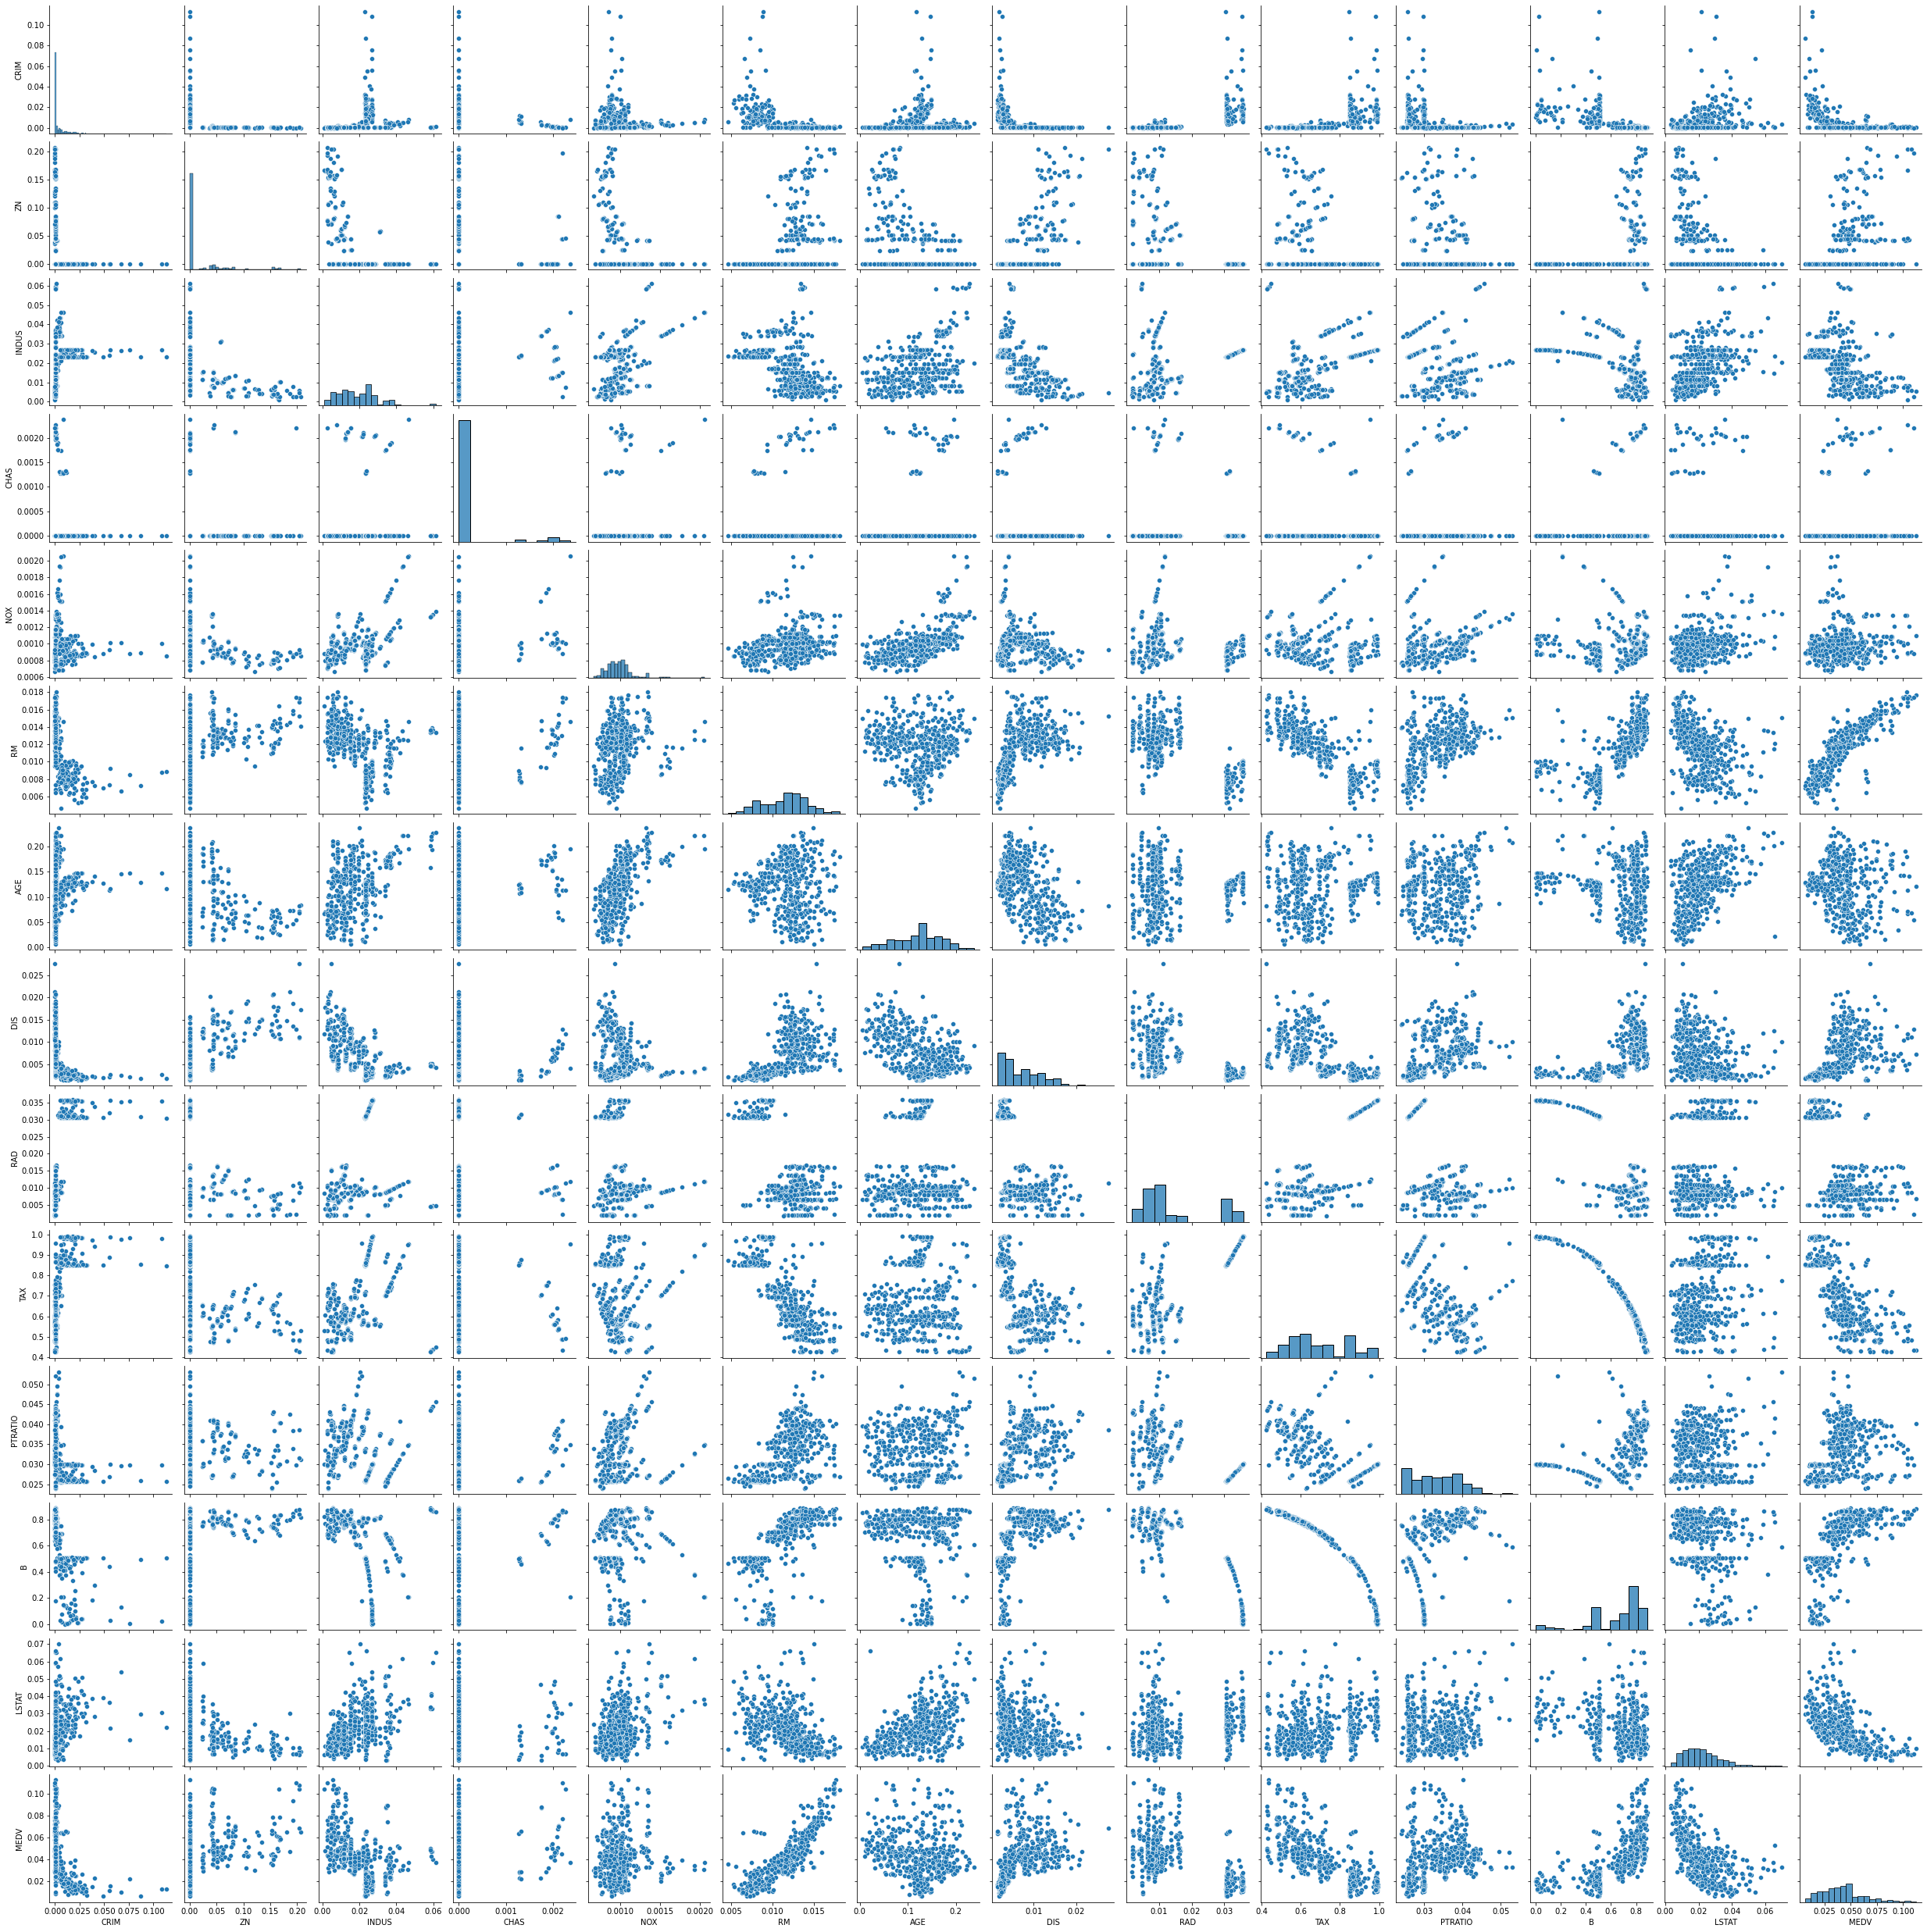

In [8]:
import seaborn as sns
sns.pairplot(data=Dades_norm)

Esto es lo que se vio en base a los analisis del trabajo anterio en el que se aprecia que al parecer MEDV tiene relacion con RM y LSTAT

## RELACION RM Y MEDV

In [10]:
x=Dades_norm["RM"].values.reshape(-1,1)
y=Dades_norm["MEDV"].values.reshape(-1,1)

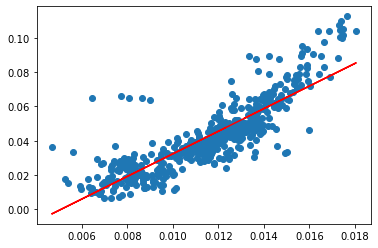

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [12]:
print(f"coefficient of determination:",model.score(x, y) )

coefficient of determination: 0.7264940658178057


In [13]:
>>> y_pred = model.predict(x)

In [14]:
>>> from sklearn.metrics import mean_squared_error
>>> mean_squared_error(y, y_pred)

0.00011591220135222668

In [15]:
from sklearn.metrics import r2_score
r2_score(y, y_pred) 

0.7264940658178057

## RELACION ENTRE LSTAT Y MEDV

In [18]:
x2=Dades_norm["LSTAT"].values.reshape(-1,1)

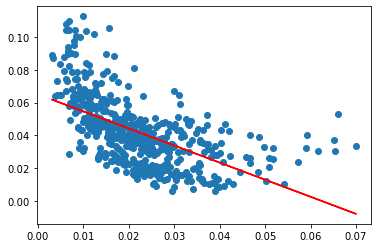

In [19]:
model = LinearRegression()
model.fit(x2, y)
y_pred = model.predict(x2)

plt.scatter(x2, y)
plt.plot(x2, y_pred, color='r')
plt.show()

In [20]:
print(f"coefficient of determination:",model.score(x, y) )

coefficient of determination: -0.5245916746465684


In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict response
y_pred2 = model.predict(x_)

In [22]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.47767957707823616


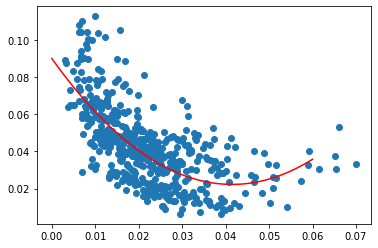

In [27]:
import numpy
MEDV_LSTAT = numpy.poly1d(numpy.polyfit(Dades_norm["LSTAT"],Dades_norm["MEDV"],2))

Line1= numpy.linspace(0,0.06)

plt.scatter(x2, y)
plt.plot(Line1, MEDV_LSTAT(Line1),c="r")
plt.show() 

In [28]:
print(f"coefficient of determination: ", MEDV_LSTAT.coef)

coefficient of determination:  [39.36548434 -3.26435611  0.08990206]


### Modelo 1 con statsmodels

#### Utilizando variables RM Y MEDV

In [30]:
import statsmodels.api as sm
X = Dades_norm["RM"]

y = Dades_norm["MEDV"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


C:\Users\verom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1339.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          5.43e-144
Time:                        16:21:48   Log-Likelihood:                 1574.9
No. Observations:                 506   AIC:                            -3146.
Df Residuals:                     504   BIC:                            -3137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0335      0.002    -15.763      0.000      -0.038      -0.029
RM             6.5869      0.180     36.589      0.000       6.233       6.941
==============================================================================
Omnibus:                      129.268   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.766
Skew:                           1.179   Prob(JB):                     2.34e-90
Kurtosis:                       6.743   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Utilizando variables RM Y MEDV

In [31]:
import statsmodels.api as sm
X = Dades_norm["LSTAT"]

y = Dades_norm["MEDV"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\verom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     243.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           4.28e-45
Time:                        16:27:06   Log-Likelihood:                 1346.7
No. Observations:                 506   AIC:                            -2689.
Df Residuals:                     504   BIC:                            -2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.002     39.600      0.000       0.062       0.068
LSTAT         -1.0406      0.067    -15.610      0.000      -1.172      -0.910
==============================================================================
Omnibus:                       46.815   Durbin-Watson:                   0.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.925
Skew:                           0.764   Prob(JB):                     2.64e-13
Kurtosis:                       3.644   Cond. No.                         88.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
mean_squared_error(y, predictions)

0.0002856862195238333

#### Utilizando variables lSTAT- RM Y MEDV

In [33]:
X = Dades_norm[["RM","LSTAT"]]

y = Dades_norm["MEDV"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\verom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     989.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          4.14e-175
Time:                        16:28:23   Log-Likelihood:                 1650.8
No. Observations:                 506   AIC:                            -3296.
Df Residuals:                     503   BIC:                            -3283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.002     -5.036      0.000      -0.017      -0.007
RM             5.7391      0.168     34.215      0.000       5.410       6.069
LSTAT         -0.5250      0.040    -13.269      0.000      -0.603      -0.447
==============================================================================
Omnibus:                      121.885   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.715
Skew:                           1.265   Prob(JB):                     4.46e-59
Kurtosis:                       5.519   Cond. No.                         408.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
mean_squared_error(y, predictions)

8.58602149090237e-05

### Modelo 2 con sklearn

In [35]:
from sklearn import linear_model

#### Utilizando variables RM Y MEDV

In [28]:
X = Dades_norm["RM"].values
y = Dades_norm["MEDV"].values
X=X.reshape((-1, 1))
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y) #r2

0.48352545599133423

#### Utilizando variables lSTAT Y MEDV

In [37]:
X = Dades_norm["LSTAT"].values
y = Dades_norm["MEDV"].values
X=X.reshape((-1, 1))
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y) #r2

0.3258960192084692

In [38]:
mean_squared_error(y, predictions)

0.0002856862195238333

#### Utilizando variables lSTAT- RM Y MEDV

In [40]:
X = Dades_norm[["RM","LSTAT"]].values
y = Dades_norm["MEDV"].values
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y) #r2

0.7974046044003859

In [41]:
mean_squared_error(y, predictions)

8.58602149090237e-05

## Exercici 2

Compara’ls en base al MSE i al R2.

Los r2  y los MSE de los dos modelos que consideramos registraron los mismo coeficientes

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = Dades_norm.drop('MEDV', axis = 1)
y = Dades_norm["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(X_train.shape); print(X_test.shape); print (y_train.shape); print (y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


####  NO SE COMO DEFINIR UNA LINEA BASE 
Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - XXXXXXXXXXXXX)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


### RANDOM FOREST REGRESSOR

In [47]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [48]:
import numpy as np

In [49]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.91 %.


In [51]:
r2_score(y_test, predictions) 

0.8969125466252711

In [52]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(list(X.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RM                   Importance: 0.78
Variable: LSTAT                Importance: 0.07
Variable: DIS                  Importance: 0.03
Variable: CRIM                 Importance: 0.02
Variable: TAX                  Importance: 0.02
Variable: PTRATIO              Importance: 0.02
Variable: B                    Importance: 0.02
Variable: INDUS                Importance: 0.01
Variable: NOX                  Importance: 0.01
Variable: AGE                  Importance: 0.01
Variable: RAD                  Importance: 0.01
Variable: ZN                   Importance: 0.0
Variable: CHAS                 Importance: 0.0


### RANDOM FOREST REGRESSOR IMPORTANTES SOLO


In [58]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [list(X.columns).index('RM'),list(X.columns).index('LSTAT')]
train_important = X_train.iloc[:, important_indices]
test_important = X_test.iloc[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print( "R2 SCORE:", r2_score(y_test, predictions) )

Mean Absolute Error: 0.01 degrees.
Accuracy: 82.92 %.
R2 SCORE: 0.8880443299283831


## Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

No estoy muy segura de como responder a este ejercicio o si me confundi con el ejercicio anterior pero se puede mirar r2 score con el random forest obtenemos indicadores que superan los 0,8

In [60]:
import matplotlib.pyplot as plt

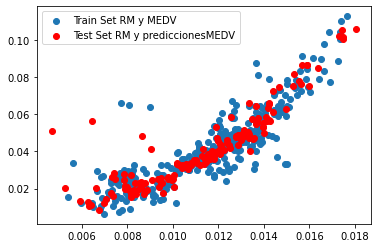

In [61]:
plt.scatter(X_train["RM"],y_train, label="Train Set RM y MEDV")
plt.scatter(X_test["RM"],predictions, c="r", label="Test Set RM y prediccionesMEDV")
plt.legend ()
plt.show()

## Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

### solo con dos variables

In [67]:
X2 = Dades_norm["LSTAT"].values.reshape((-1, 1))
y2 = Dades_norm["MEDV"].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=40)

print(X_train2.shape); print(X_test2.shape); print (y_train2.shape); print (y_test2.shape)

(354, 1)
(152, 1)
(354,)
(152,)


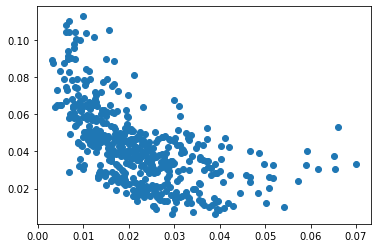

In [69]:
plt.scatter(X2,y2)

In [70]:
X_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_train2)
model = LinearRegression(fit_intercept=False).fit(X_, y_train2)
r_sq = model.score(X_, y_train2)
print(f"coefficient of determination: {r_sq}", f"intercept: {model.intercept_}", f"coefficients: {model.coef_}")

coefficient of determination: 0.45459574825998084 intercept: 0.0 coefficients: [ 0.08809479 -3.22986976 40.46218028]


In [72]:
Xtest_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_test2)
y_pred = model.predict(Xtest_)
r2_score(y_test2, y_pred) 

0.5067448216598738

In [95]:
x_new = np.arange(70)/1000
x_new =  x_new.reshape((-1, 1))      

In [96]:
x_new_= PolynomialFeatures(degree=2, include_bias=True).fit_transform(x_new)
y_new=model.predict(x_new_)

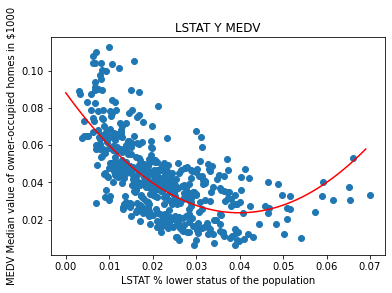

In [98]:
plt.scatter(X2,y2)
plt.plot(x_new,y_new, c="r")
plt.title('LSTAT Y MEDV')
plt.xlabel('LSTAT % lower status of the population')
plt.ylabel('MEDV Median value of owner-occupied homes in $1000')
plt.show()

## con todas menos con RM

In [99]:
restante=X_train.drop('RM', axis=1)
restante

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
58,0.000318,0.051469,0.010561,0.000000,0.000933,0.060116,0.016089,0.016470,0.584689,0.040558,0.804318,0.014123
410,0.075572,0.000000,0.026750,0.000000,0.000882,0.147787,0.002088,0.035469,0.984264,0.029853,0.003842,0.014941
481,0.007335,0.000000,0.023257,0.000000,0.000684,0.096240,0.004281,0.030838,0.855752,0.025955,0.505061,0.009945
69,0.000243,0.023674,0.011496,0.000000,0.000775,0.062498,0.012306,0.007576,0.653389,0.035794,0.751682,0.016647
41,0.000282,0.000000,0.015298,0.000000,0.000992,0.006420,0.012666,0.006642,0.515839,0.039629,0.853259,0.010715
...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.028285,0.000000,0.023217,0.000000,0.000949,0.118524,0.002394,0.030785,0.854294,0.025911,0.502122,0.028361
165,0.006095,0.000000,0.040815,0.000000,0.001261,0.193863,0.004760,0.010423,0.840072,0.030643,0.500625,0.020449
7,0.000281,0.024276,0.015284,0.000000,0.001018,0.186634,0.011556,0.009710,0.603986,0.029520,0.770810,0.037191
219,0.000233,0.000000,0.028298,0.002037,0.001121,0.188249,0.006852,0.010187,0.562301,0.033412,0.802175,0.021392


In [101]:
rf_rest = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
train_rest = X_train.drop('RM', axis=1)
test_rest= X_test.drop('RM', axis=1)
# Train the random forest
rf_rest.fit(train_rest, y_train)
# Make predictions and determine the error
predictions = rf_rest.predict(test_rest)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print( "R2 SCORE:", r2_score(y_test, predictions) )

Mean Absolute Error: 0.01 degrees.
Accuracy: 82.23 %.
R2 SCORE: 0.766193600471936


## Visualización

In [103]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.tree import export_graphviz
import pydot

In [106]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_rest, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = list(train_rest.columns), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')